In [4]:
import numpy as np
import pandas as pd
from math import sqrt

from mlgrad.cluster import KMeans, KMeansMahalanobis

In [5]:
def permutate_values(Yp, Y, m):
    d = {}
    for yp,y in zip(Yp, Y):
        c = d.setdefault((yp,y), 0)
        d[(yp,y)] = c+1
    print(d)
    values = np.array(list(d.values()))
    keys = list(d.keys())
    indices = list(np.argsort(values))
    keys = [keys[indices[-i]] for i in range(1,m+1)]
    print(keys)
    d = dict(keys)
    for i in range(len(Y)):
        yp = Yp[i]
        Yp[i] = d[yp]

In [6]:
sdata = pd.read_csv("../data/cbb/s2.txt", names=['x1', 'x2'], sep='\s+')

FileNotFoundError: [Errno 2] No such file or directory: '../data/cbb/s2.txt'

In [9]:
X = np.c_[sdata['x1'], sdata['x2']]
X = np.ascontiguousarray(X, 'd')
X = scale(X)  
print(len(X))
print(X)

5000
[[ 1.450  0.681]
 [ 1.301  0.711]
 [ 1.552  0.563]
 ...
 [ 0.819 -1.309]
 [ 0.605 -1.432]
 [ 0.635 -1.622]]


In [10]:
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
x_min = min(x1_min, x2_min)
x_max = max(x1_max, x2_max)
extent = (x_min, x_max, x_min, x_max)
xrange1 = np.linspace(x_min, x_max, 100)
xrange2 = np.linspace(x_min, x_max, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]

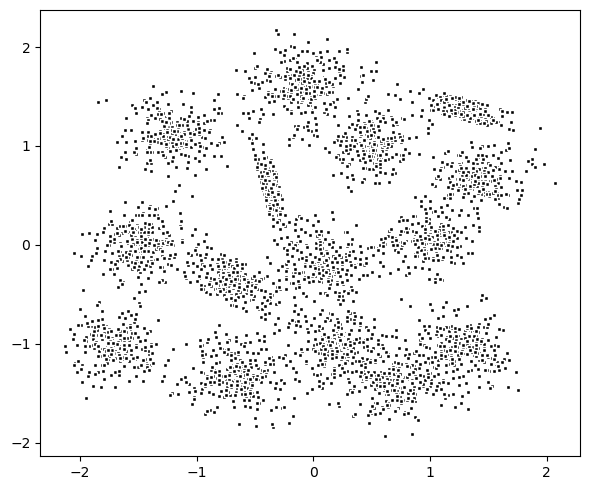

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.show()

In [7]:
alpha = 0.9

In [8]:
# avgmin = avragg.SoftMinimal(2.0)
avgmin = avragg.Minimal()
avrfunc = averager_it(func.QuantileFunc(alpha, func.Sqrt(0.001)))
# avrfunc = averager_it(func.QuantileFunc(alpha, func.Power(1.01, 0.001)))
avrfunc = avragg.ParameterizedAverage(func.WinsorizedSmoothFunc(func.Sqrt(0.001)), avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, avgmin, 15, 
                                    tol=1.0e-9, n_iter=200)

In [9]:
hcd.fit(X)

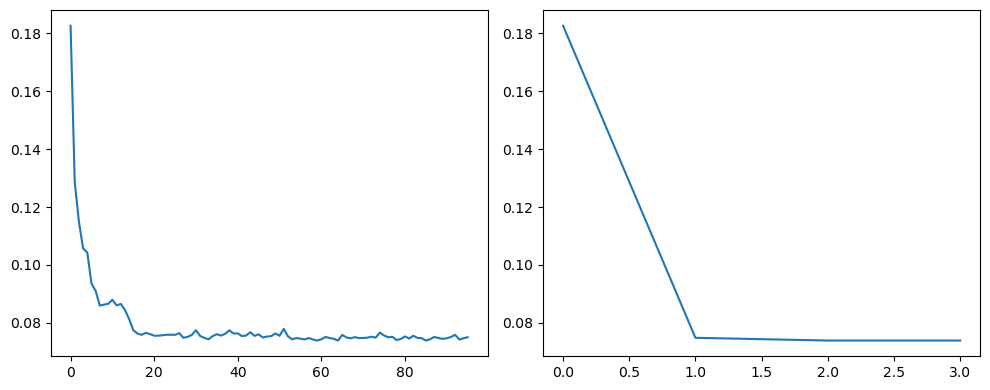

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hcd.dvals)
plt.subplot(1,2,2)
plt.plot(hcd.dvals2)
plt.show()

In [11]:
D = hcd.evaluate_dist(XX)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

9.656602133138812e-05 3.231407928134326


In [12]:
# plt.figure(figsize=(8,7))
# plt.scatter(X[:,0], X[:,1], c='k', edgecolors='w', marker='s', s=9)
# plt.contour(DD, origin='lower', extent=extent, 
#             levels=np.linspace(0.0,D.max(),100), colors='grey', linewidths=0.5)
# plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=100)
# plt.show()

In [13]:
# avgmin = avragg.SoftMinimal(2.0)
avgmin2 = avragg.Minimal()
avrfunc2 = averager_it(func.QuantileFunc(alpha, func.Sqrt(0.001)))
# avrfunc = averager_it(func.QuantileFunc(alpha, func.Power(1.01, 0.001)))
avrfunc2 = avragg.ParameterizedAverage(func.WinsorizedSmoothFunc(func.Sqrt(0.001)), avrfunc2)
hcd2 = mlocation_scatter.MLocationsScattersEstimator(avrfunc2, avgmin2, 15, 
                                    tol=1.0e-9, n_iter=200)

In [14]:
hcd2.fit(X)

In [15]:
D_2 = hcd2.evaluate_dist(XX)
DD_2 = D_2.reshape(XX1.shape)
print(D_2.min(), D_2.max())

5.362096088600346e-05 4.973417463846362


### Среднее арифметическое

In [16]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, avgmin, 15, 
                                    tol=1.0e-9, n_iter=200)

In [17]:
km.fit(X)

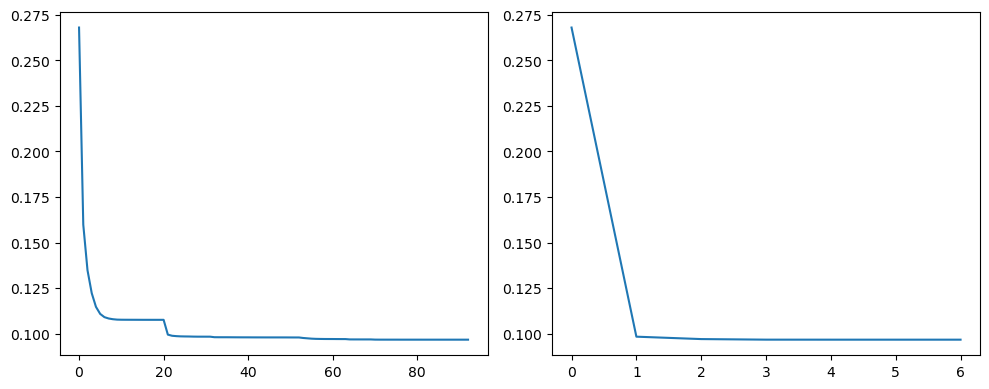

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(km.dvals)
plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

In [19]:
D2 = km.evaluate_dist(XX)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())

9.088445738451674e-06 3.8456883892344993


In [20]:
# plt.figure(figsize=(7,6))
# plt.contour(DD2, origin='lower', extent=extent, 
#             levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
# plt.scatter(X[:,0], X[:,1], c='k', edgecolors='w', marker='s', s=9)
# plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=100)
# plt.show()

In [21]:
arith2 = avragg.ArithMean()
km2 = mlocation_scatter.MLocationsScattersEstimator(arith2, avgmin, 15, 
                                    tol=1.0e-9, n_iter=200)

In [22]:
km2.fit(X)

In [23]:
D2_2 = km2.evaluate_dist(XX)
DD2_2 = D2_2.reshape(XX1.shape)
print(D2_2.min(), D2_2.max())

2.9253406641998312e-05 3.3386309084508845


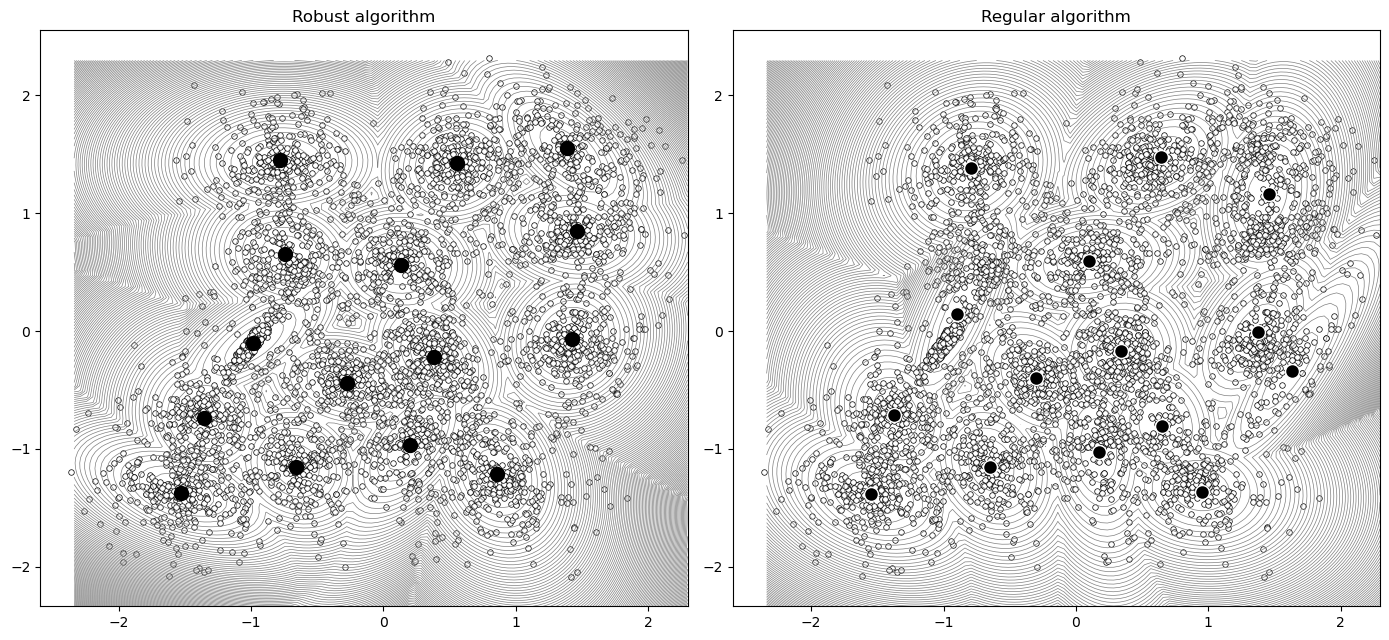

In [24]:
plt.figure(figsize=(14,6.5))

plt.subplot(1,2,1)
plt.title('Robust algorithm')
plt.contour(DD, origin='lower', extent=extent, 
            levels=np.linspace(0.,D.max(),100), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', linewidths=0.5, s=16)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=100)

plt.subplot(1,2,2)
plt.title('Regular algorithm')
plt.contour(DD2, origin='lower', extent=extent, 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', linewidths=0.5, s=16)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=100)
plt.savefig('fig/robust_kmeans_center_variance_s4.eps')
plt.tight_layout()
plt.show()

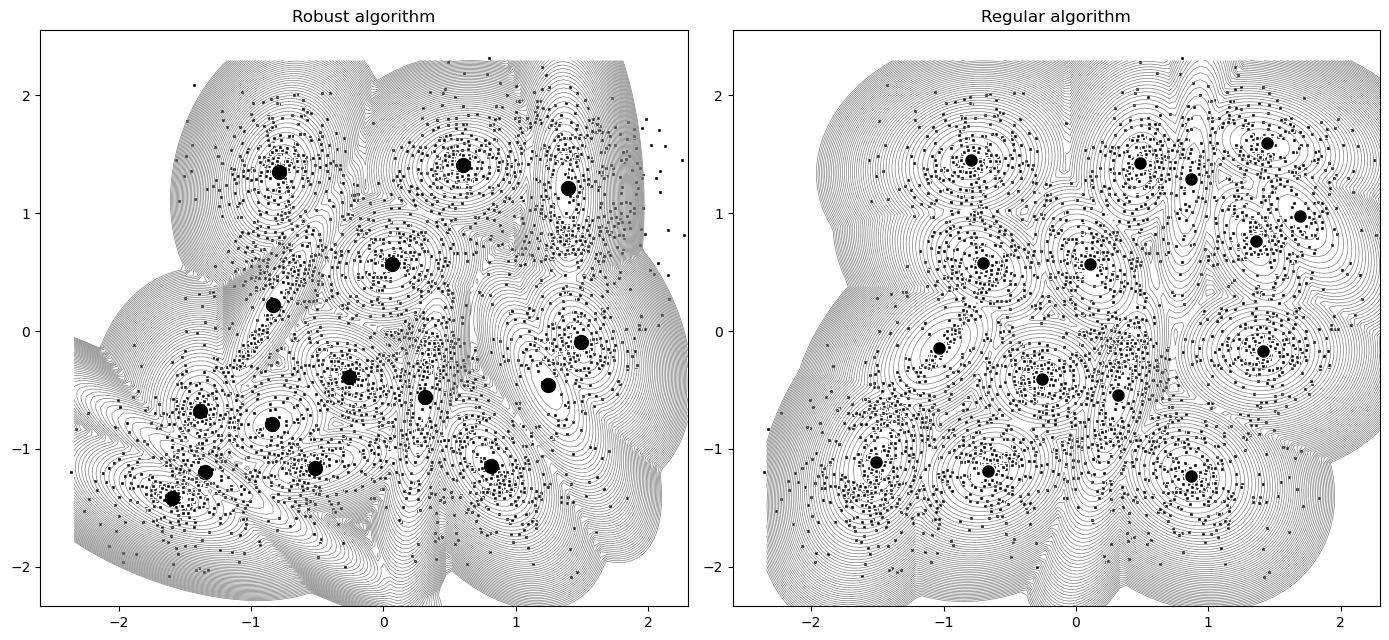

In [28]:
plt.figure(figsize=(14,6.5))

plt.subplot(1,2,1)
plt.title('Robust algorithm')
plt.contour(DD_2, origin='lower', extent=extent, 
            levels=np.linspace(0.,D_2.max(),50), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.scatter(hcd2.locs[:,0], hcd2.locs[:,1], c='k', edgecolors='k', s=100)

plt.subplot(1,2,2)
plt.title('Regular algorithm')
plt.contour(DD2_2, origin='lower', extent=extent, 
            levels=np.linspace(0.,D2_2.max(),50), colors='grey', linewidths=0.5)
plt.scatter(X[:,0], X[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.scatter(km2.locs[:,0], km2.locs[:,1], c='k', edgecolors='w', s=100)
plt.savefig('fig/robust_kmeans_center_variance2_s4.eps')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


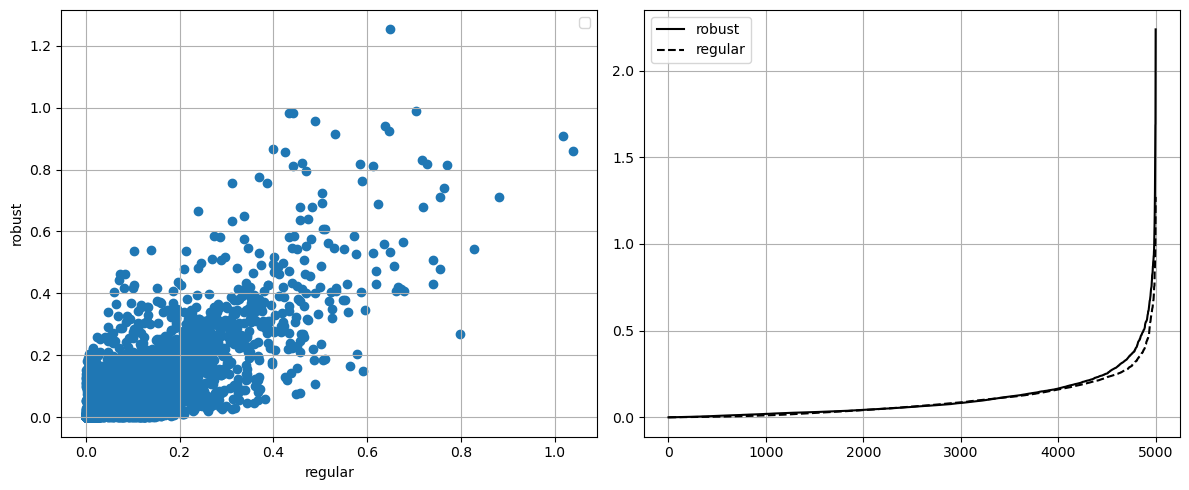

In [38]:
D_1 = hcd.evaluate_dist(X)
D_2 = km.evaluate_dist(X)
D2_1 = hcd2.evaluate_dist(X)
D2_2 = km2.evaluate_dist(X)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
# plt.plot(sorted(D_1), label='robust (S)', c='k', marker='s', markersize=4)
# plt.plot(sorted(D_2), label='regular (S)', c='k', linestyle='--', marker='s', markersize=4)
plt.scatter(D_2, D_1)
plt.xlabel('regular')
plt.ylabel('robust')
plt.legend()
# plt.ylim(1e-6, 5)
plt.grid(1)
plt.subplot(1,2,2)
plt.plot(sorted(D2_1), label='robust', c='k')
plt.plot(sorted(D2_2), label='regular', c='k', linestyle='--')
plt.legend()
# plt.ylim(1e-6, 5)
plt.grid(1)
plt.savefig('fig/distances_s4.eps')
plt.show()